Saving lebin.csv to lebin (1).csv
✅ File loaded successfully!

📄 First 5 rows of the dataset:
   year industry_code_ANZSIC               industry_name_ANZSIC rme_size_grp  \
0  2011                    A  Agriculture, Forestry and Fishing          a_0   
1  2011                    A  Agriculture, Forestry and Fishing          a_0   
2  2011                    A  Agriculture, Forestry and Fishing          a_0   
3  2011                    A  Agriculture, Forestry and Fishing          a_0   
4  2011                    A  Agriculture, Forestry and Fishing          a_0   

                                          variable  value               unit  \
0                                    Activity unit  46134              COUNT   
1                           Rolling mean employees      0              COUNT   
2                          Salaries and wages paid    279  DOLLARS(millions)   
3  Sales, government funding, grants and subsidies   8187  DOLLARS(millions)   
4                        

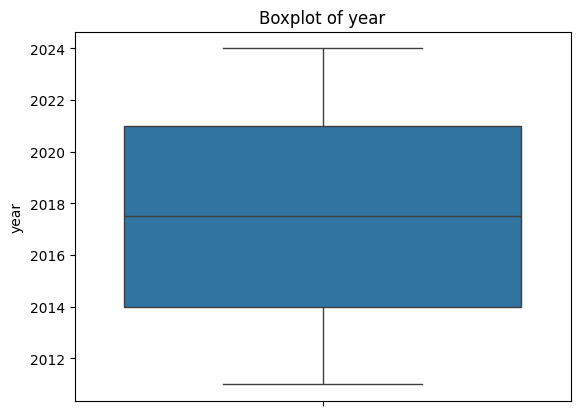

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


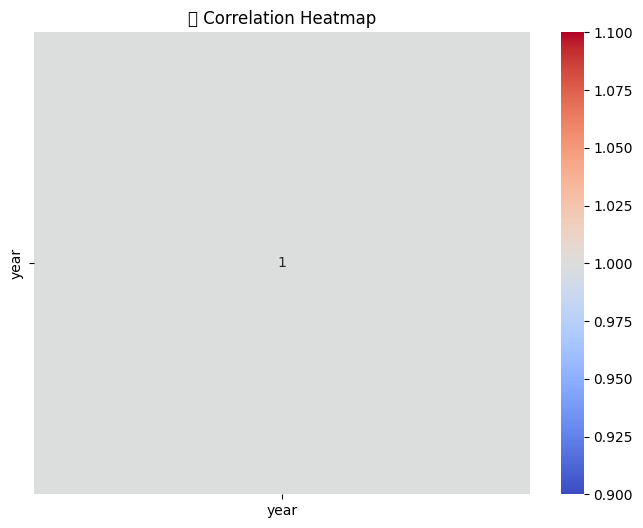

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read the uploaded file
filename = next(iter(uploaded))  # Gets the uploaded file name
data = pd.read_csv(filename)
print("✅ File loaded successfully!")

# Show first few rows
print("\n📄 First 5 rows of the dataset:")
print(data.head())

# Show basic info about the dataset
print("\nℹ️ Dataset info:")
print(data.info())

# Check for missing values and duplicates
print("\n🧼 Missing values in each column:")
print(data.isnull().sum())

print("\n🔁 Number of duplicate rows:", data.duplicated().sum())

# Convert Gender column if it exists
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    print("\n✅ Converted 'Gender' column to numeric.")

# Show boxplots for numeric columns with sufficient non-null values
numeric_cols = data.select_dtypes(include='number').columns
print(f"\n📊 Numeric columns found: {list(numeric_cols)}")

# Set a threshold for non-null values (e.g., 50% of the data)
non_null_threshold = len(data) * 0.5

plottable_numeric_cols = [col for col in numeric_cols if data[col].notnull().sum() >= non_null_threshold]

print(f"\n📊 Plottable numeric columns (with at least {non_null_threshold} non-null values): {list(plottable_numeric_cols)}")


for col in plottable_numeric_cols:
    plt.figure()
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Show correlation heatmap for plottable numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(data[plottable_numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("📈 Correlation Heatmap")
plt.show()